<a href="https://colab.research.google.com/github/amballa-mahesh/ML_titanic_data-using-ensemble-model/blob/main/ML_titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

Reading Data

In [3]:
df_train = pd.read_csv('/content/train.csv')

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Removing Unnecessary columns

In [6]:
df_train.drop(['PassengerId','Name','Ticket','Fare',"Cabin"],axis=1,inplace =True)

In [7]:
df_train.replace_index =True

In [8]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


Imputing Missing Values

In [10]:
mode_Embarked = df_train['Embarked'].mode()
mode_Embarked[0]

'S'

In [11]:
df_train['Embarked'].fillna(mode_Embarked[0],inplace =True)

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [13]:
import numpy as np

In [14]:
age_female = round(df_train['Age'][df_train['Sex']=='female'].mean(),2)
age_male   = round(df_train['Age'][df_train['Sex']=='male'].mean(),2)
age_male,age_female

(30.73, 27.92)

In [15]:
df_train['Age'].fillna('',inplace =True)

In [16]:
for i in range(0,df_train.shape[0]):
  if df_train.loc[i,'Sex']=='female' and df_train.loc[i,'Age']=='':
    df_train.loc[i,'Age'] = age_female
  elif df_train.loc[i,'Sex']=='male' and df_train.loc[i,'Age']=='':
    df_train.loc[i,'Age'] = age_male

In [17]:
df_train['Age'] = df_train['Age'].astype('float')

In [18]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


Creating OneHot Encoding

In [19]:
df_train = pd.get_dummies(df_train,columns= ['Pclass','Embarked','SibSp','Parch'],drop_first =True)

In [20]:
df_train['Sex'].replace({'male':0,'female':1},inplace=True)

In [21]:
df_train.head()

,Survived,Sex,Age,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,0,0,22.0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
1,1,1,38.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,1,26.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,35.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,35.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0


Treating Outliers

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

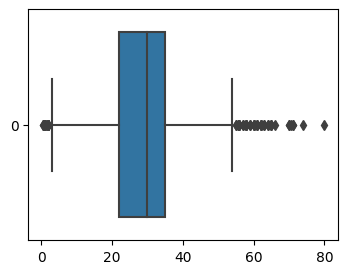

In [23]:
plt.figure(figsize=(4,3))
sns.boxplot(df_train['Age'],orient ='h')
plt.show()

In [24]:
age_q1 = np.percentile(df_train['Age'],25)
age_q3 = np.percentile(df_train['Age'],75)
age_iqr = age_q3 - age_q1
lw_limit = age_q1-(1.5*age_iqr)
up_limit = age_q3+(1.5*age_iqr)

lw_limit,up_limit

(2.5, 54.5)

In [25]:
for i in range(0,df_train.shape[0]):
  if df_train.loc[i,'Age'] < lw_limit:
    df_train.loc[i,'Age'] = lw_limit
  if df_train.loc[i,'Age'] > up_limit:
    df_train.loc[i,'Age']  = up_limit


<Axes: >

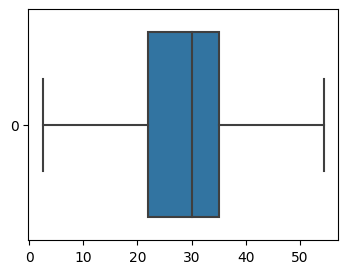

In [26]:
plt.figure(figsize=(4,3))
sns.boxplot(df_train['Age'],orient ='h')

Scaling the data using MinMax Scaling

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

In [28]:
scaler_age = np.round(scaler.fit_transform(np.array(df_train['Age']).reshape(-1,1)),4)

In [29]:
df_train['Age'] = scaler_age

In [30]:
df_train.head()

,Survived,Sex,Age,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,0,0,0.3750,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0.6827,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0.4519,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0.6250,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0.6250,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0


Spliting the data into Dependent and Independent Variables

In [31]:
X = df_train.drop('Survived',axis = 1, inplace =False)
y = df_train['Survived']

In [32]:
X.head()

,Sex,Age,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,0,0.3750,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0.6827,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0.4519,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0.6250,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0.6250,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0


# Creation of Model Using GridsearchCV for hypertunning the parameters, and ROC curve, AUC for finding the thershold.(Logistic Regression)

In [33]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [34]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state =123,stratify =y)

In [79]:
estimator = LogisticRegression()
C = np.array([0.0000001,0.00001,0.0001,0.001,0.01,0.1,1,10,100])
param_grid = {'C':C}
neigh = GridSearchCV(estimator,param_grid,cv = 5,scoring= "roc_auc",return_train_score=True,verbose =2)

In [80]:
neigh.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ............................................C=1e-07; total time=   0.0s
[CV] END ............................................C=1e-07; total time=   0.0s
[CV] END ............................................C=1e-07; total time=   0.0s
[CV] END ............................................C=1e-07; total time=   0.0s
[CV] END ............................................C=1e-07; total time=   0.0s
[CV] END ............................................C=1e-05; total time=   0.0s
[CV] END ............................................C=1e-05; total time=   0.0s
[CV] END ............................................C=1e-05; total time=   0.0s
[CV] END ............................................C=1e-05; total time=   0.0s
[CV] END ............................................C=1e-05; total time=   0.0s
[CV] END ...........................................C=0.0001; total time=   0.0s
[CV] END ........................................

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-07, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02])},
             return_train_score=True, scoring='roc_auc', verbose=2)

In [81]:
neigh.best_params_

{'C': 10.0}

In [84]:
neigh.best_params_['C']

10.0

In [85]:
results = pd.DataFrame.from_dict(neigh.cv_results_)

In [39]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.029434,0.016936,0.006191,0.002863,0.0,{'C': 1e-07},0.904029,0.824897,0.846486,0.811448,...,0.836013,0.038197,7,0.821493,0.844096,0.839168,0.841783,0.848682,0.839044,0.009316
1,0.025424,0.009278,0.006832,0.001916,0.00001,{'C': 1e-05},0.904029,0.824897,0.846486,0.811448,...,0.836013,0.038197,7,0.821532,0.844096,0.839181,0.841939,0.848682,0.839086,0.009311
2,0.021398,0.007793,0.005966,0.002236,0.0001,{'C': 0.0001},0.904029,0.824897,0.846486,0.811448,...,0.836013,0.038197,7,0.821558,0.844069,0.839181,0.841900,0.848682,0.839078,0.009296
3,0.021339,0.010607,0.005811,0.002820,0.001,{'C': 0.001},0.904442,0.824690,0.847117,0.812079,...,0.836265,0.038358,6,0.821689,0.844226,0.839259,0.841952,0.848656,0.839157,0.009262
4,0.023149,0.007075,0.010335,0.002849,0.01,{'C': 0.01},0.906921,0.822417,0.846065,0.816077,...,0.837356,0.038367,5,0.823858,0.845259,0.838583,0.844209,0.852370,0.840856,0.009563
5,0.042735,0.024595,0.013414,0.010891,0.1,{'C': 0.1},0.914360,0.829855,0.855324,0.818182,...,0.843774,0.039449,4,0.833438,0.856393,0.847871,0.851995,0.862796,0.850499,0.009861
6,0.047155,0.019764,0.010860,0.005471,1.0,{'C': 1.0},0.921798,0.833781,0.853430,0.840699,...,0.852637,0.036919,3,0.846245,0.868783,0.861804,0.862097,0.872530,0.862292,0.008997
7,0.048581,0.011510,0.005891,0.002866,10.0,{'C': 10.0},0.917459,0.835640,0.844171,0.849327,...,0.853645,0.033256,1,0.850022,0.872363,0.868178,0.866370,0.875984,0.866584,0.008929
8,0.076443,0.027814,0.012919,0.013722,100.0,{'C': 100.0},0.910021,0.835227,0.846907,0.850168,...,0.853250,0.029857,2,0.852597,0.874075,0.870689,0.867307,0.876896,0.868313,0.008492


In [86]:
train_score = results['mean_train_score']
test_score  = results['mean_test_score']
C_values    = results['param_C']

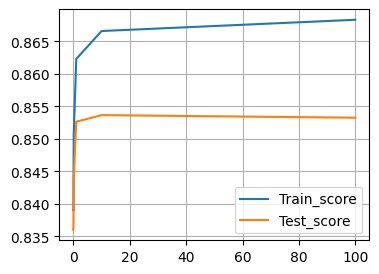

best_C :  {'C': 10.0}
best_score: 0.8536453484690162


In [87]:
plt.figure(figsize=(4,3))
plt.plot(C_values,train_score,label = "Train_score")
plt.plot(C_values,test_score,label = "Test_score")
plt.grid()
plt.legend()
plt.show()
print('best_C : ',neigh.best_params_)
print('best_score:', neigh.best_score_)

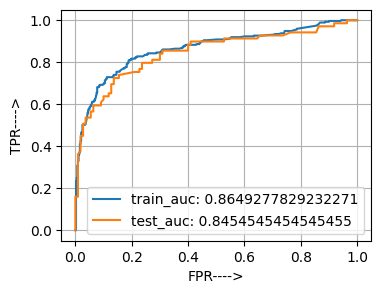

In [88]:
from sklearn.metrics import roc_curve, auc

neigh = LogisticRegression(C= neigh.best_params_['C'],penalty='l2')
neigh.fit(x_train,y_train)

y_train_pred = neigh.predict_log_proba(x_train)[:,1]
y_test_pred  = neigh.predict_log_proba(x_test)[:,1]

tr_fpr,tr_tpr,tr_thershold = roc_curve(y_train,y_train_pred)
ts_fpr,ts_tpr,ts_thershold = roc_curve(y_test,y_test_pred)

plt.figure(figsize=(4,3))
plt.plot(tr_fpr,tr_tpr,label = 'train_auc: '+ str(auc(tr_fpr,tr_tpr)))
plt.plot(ts_fpr,ts_tpr,label = 'test_auc: '+ str(auc(ts_fpr,ts_tpr)))
plt.xlabel('FPR---->')
plt.ylabel('TPR---->')
plt.grid()
plt.legend()
plt.show()

In [43]:
tr_ther = tr_thershold[np.argmax([tr_tpr*(1-tr_fpr)])]
tr_ther

-1.0260773866725121

In [44]:
train_preds = []
for i in y_train_pred:
  if i>=tr_ther:
    train_preds.append(1)
  else:
    train_preds.append(0)


In [45]:
print(accuracy_score(y_train,train_preds))
print(confusion_matrix(y_train,train_preds))

0.8103932584269663
[[356  83]
 [ 52 221]]


In [46]:
ts_ther = ts_thershold[np.argmax([ts_tpr*(1-ts_fpr)])]
ts_ther

-0.76615129877746

In [47]:
test_preds = []
for i in y_test_pred:
  if i>=ts_ther:
    test_preds.append(1)
  else:
    test_preds.append(0)

In [48]:
print(accuracy_score(y_test,test_preds))
print(confusion_matrix(y_test,test_preds))

0.8100558659217877
[[95 15]
 [19 50]]


In [178]:
scores= dict()
score_lr = accuracy_score(y_test,test_preds)
score_lr
scores['Logistic_regression']= round(score_lr,2)

# Creation of Model Using GridsearchCV for hypertunning the parameters, and ROC curve, AUC for finding the thershold.(MultinomialNB)

In [50]:
from sklearn.naive_bayes import MultinomialNB

In [89]:
estimator = MultinomialNB()
alphas = np.array([0.00001,0.0001,0.001,0.01,0.1,1,2,3,4,5,6,10,40,50,100])
param_grid = {'alpha':alphas}
neigh  = GridSearchCV(estimator,param_grid,cv= 5,scoring = 'roc_auc',return_train_score =True,verbose = 1)

In [90]:
neigh.fit(x_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 2.e+00, 3.e+00,
       4.e+00, 5.e+00, 6.e+00, 1.e+01, 4.e+01, 5.e+01, 1.e+02])},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [91]:
neigh.best_params_

{'alpha': 1.0}

In [92]:
results = pd.DataFrame.from_dict(neigh.cv_results_)

In [55]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006797,0.003268,0.005340,0.000893,0.00001,{'alpha': 1e-05},0.893698,0.817252,0.849642,0.803241,...,0.831534,0.036381,13,0.826355,0.852002,0.849588,0.847969,0.853595,0.845902,0.009964
1,0.017718,0.007698,0.020706,0.011404,0.0001,{'alpha': 0.0001},0.893698,0.817252,0.849642,0.803241,...,0.831534,0.036381,13,0.826355,0.852002,0.849588,0.847969,0.853595,0.845902,0.009964
2,0.008012,0.002154,0.007587,0.003470,0.001,{'alpha': 0.001},0.893698,0.817252,0.849642,0.803241,...,0.831534,0.036381,13,0.826355,0.851989,0.849588,0.847943,0.853595,0.845894,0.009961
3,0.006764,0.003098,0.006485,0.003311,0.01,{'alpha': 0.01},0.893698,0.817252,0.849642,0.803451,...,0.831576,0.036349,12,0.826315,0.851924,0.849575,0.847917,0.853595,0.845865,0.009966
4,0.004362,0.000242,0.004214,0.000209,0.1,{'alpha': 0.1},0.894318,0.817252,0.849642,0.804924,...,0.831994,0.036337,10,0.825819,0.851780,0.849601,0.847904,0.853387,0.845698,0.010113
5,0.008053,0.005003,0.006254,0.003883,1.0,{'alpha': 1.0},0.908368,0.817252,0.847327,0.807870,...,0.834136,0.041519,1,0.822107,0.848787,0.848300,0.848164,0.851172,0.843706,0.010854
6,0.008317,0.004975,0.006345,0.004214,2.0,{'alpha': 2.0},0.908574,0.817252,0.852378,0.809133,...,0.833852,0.043612,2,0.822525,0.847912,0.845438,0.846967,0.849921,0.842553,0.010118
7,0.011429,0.006702,0.012738,0.004384,3.0,{'alpha': 3.0},0.908368,0.816839,0.853851,0.809133,...,0.833229,0.044667,5,0.821388,0.847846,0.843773,0.845874,0.849295,0.841635,0.010293
8,0.012820,0.006854,0.012598,0.001358,4.0,{'alpha': 4.0},0.907955,0.814979,0.852588,0.809554,...,0.832271,0.044924,7,0.820905,0.846735,0.842329,0.845237,0.849608,0.840963,0.010301
9,0.009919,0.004424,0.012103,0.006323,5.0,{'alpha': 5.0},0.906508,0.816219,0.851747,0.811237,...,0.832398,0.044103,6,0.819938,0.845990,0.841379,0.844951,0.849126,0.840277,0.010466


In [93]:
train_score = results['mean_train_score']
test_score  = results['mean_test_score']
alpha_values= results['param_alpha']

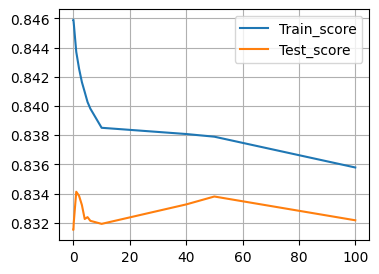

best alphas value is:  {'alpha': 1.0}


In [94]:
plt.figure(figsize=(4,3))
plt.plot(alpha_values,train_score,label= 'Train_score')
plt.plot(alpha_values,test_score, label= 'Test_score' )
plt.legend()
plt.grid()
plt.show()
print('best alphas value is: ',neigh.best_params_)

In [95]:
neigh = MultinomialNB(alpha=neigh.best_params_['alpha'])
neigh.fit(x_train,y_train)

MultinomialNB()

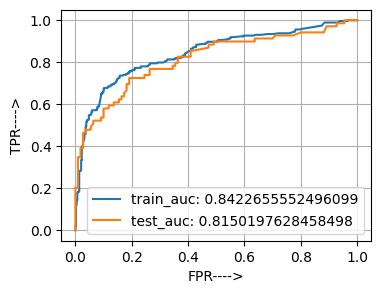

In [96]:
y_train_pred = neigh.predict_log_proba(x_train)[:,1]
y_test_pred  = neigh.predict_log_proba(x_test)[:,1]

tr_fpr,tr_tpr,tr_thershold = roc_curve(y_train,y_train_pred)
ts_fpr,ts_tpr,ts_thershold = roc_curve(y_test,y_test_pred)

plt.figure(figsize=(4,3))
plt.plot(tr_fpr,tr_tpr,label = 'train_auc: '+ str(auc(tr_fpr,tr_tpr)))
plt.plot(ts_fpr,ts_tpr,label = 'test_auc: '+ str(auc(ts_fpr,ts_tpr)))
plt.xlabel('FPR---->')
plt.ylabel('TPR---->')
plt.grid()
plt.legend()
plt.show()


In [97]:
tr_ther = tr_thershold[np.argmax((tr_tpr*(1-tr_fpr)))]
tr_ther

train_preds = []
for i in y_train_pred:
  if i>=tr_ther:
    train_preds.append(1)
  else:
    train_preds.append(0)

print(accuracy_score(y_train,train_preds))

0.8019662921348315


In [98]:
ts_ther = ts_thershold[np.argmax((ts_tpr*(1-ts_fpr)))]
ts_ther

test_preds = []
for i in y_test_pred:
  if i>=ts_ther:
    test_preds.append(1)
  else:
    test_preds.append(0)

print(accuracy_score(y_test,test_preds))

0.776536312849162


In [180]:
score_nb = accuracy_score(y_test,test_preds)
scores['Naive_bayes']= round(score_nb,2)

# Creation of Model Using GridsearchCV for hypertunning the parameters, and ROC curve, AUC for finding the thershold.(Support Vector Machine)

In [100]:
from sklearn.svm import SVC

In [196]:
estimator = SVC()
C      = np.array([0.0000001,0.00001,0.0001,0.001,0.01,0.1,1])
gamma  = np.array([0.0000001,0.00001,0.0001,0.001,0.01,0.1,1])
kernel = ['poly','rbf']
degree = np.array([1,2,3])
param_grid = {'C':C,"gamma":gamma,'kernel':kernel,'degree':degree}
neigh = GridSearchCV(estimator,param_grid,cv = 5,scoring ='roc_auc',return_train_score=True,verbose = 2)

In [197]:
neigh.fit(x_train,y_train)

Fitting 5 folds for each of 294 candidates, totalling 1470 fits
[CV] END ........C=1e-07, degree=1, gamma=1e-07, kernel=poly; total time=   0.0s
[CV] END ........C=1e-07, degree=1, gamma=1e-07, kernel=poly; total time=   0.0s
[CV] END ........C=1e-07, degree=1, gamma=1e-07, kernel=poly; total time=   0.0s
[CV] END ........C=1e-07, degree=1, gamma=1e-07, kernel=poly; total time=   0.0s
[CV] END ........C=1e-07, degree=1, gamma=1e-07, kernel=poly; total time=   0.0s
[CV] END .........C=1e-07, degree=1, gamma=1e-07, kernel=rbf; total time=   0.0s
[CV] END .........C=1e-07, degree=1, gamma=1e-07, kernel=rbf; total time=   0.0s
[CV] END .........C=1e-07, degree=1, gamma=1e-07, kernel=rbf; total time=   0.0s
[CV] END .........C=1e-07, degree=1, gamma=1e-07, kernel=rbf; total time=   0.0s
[CV] END .........C=1e-07, degree=1, gamma=1e-07, kernel=rbf; total time=   0.0s
[CV] END ........C=1e-07, degree=1, gamma=1e-05, kernel=poly; total time=   0.0s
[CV] END ........C=1e-07, degree=1, gamma=1e-

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([1.e-07, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00]),
                         'degree': array([1, 2, 3]),
                         'gamma': array([1.e-07, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00]),
                         'kernel': ['poly', 'rbf']},
             return_train_score=True, scoring='roc_auc', verbose=2)

In [198]:
neigh.best_params_

{'C': 0.1, 'degree': 2, 'gamma': 1.0, 'kernel': 'poly'}

In [199]:
results = pd.DataFrame.from_dict(neigh.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_gamma,param_kernel,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.021265,0.003134,0.007581,0.000211,0.0,1,0.0,poly,"{'C': 1e-07, 'degree': 1, 'gamma': 1e-07, 'ker...",0.916012,...,0.840430,0.043175,77,0.827988,0.853080,0.847487,0.844977,0.856352,0.845977,0.009849
1,0.023350,0.002035,0.011834,0.000724,0.0,1,0.0,rbf,"{'C': 1e-07, 'degree': 1, 'gamma': 1e-07, 'ker...",0.910021,...,0.839256,0.041422,122,0.827008,0.851983,0.848587,0.844755,0.856326,0.845732,0.010109
2,0.019118,0.000837,0.008757,0.001979,0.0,1,0.00001,poly,"{'C': 1e-07, 'degree': 1, 'gamma': 1e-05, 'ker...",0.914979,...,0.840523,0.041936,63,0.828099,0.853401,0.847617,0.844437,0.857179,0.846147,0.010051
3,0.024996,0.001412,0.011621,0.000281,0.0,1,0.00001,rbf,"{'C': 1e-07, 'degree': 1, 'gamma': 1e-05, 'ker...",0.910434,...,0.839166,0.041393,128,0.826237,0.853329,0.847546,0.844430,0.856137,0.845536,0.010496
4,0.019460,0.001148,0.008180,0.000456,0.0,1,0.0001,poly,"{'C': 1e-07, 'degree': 1, 'gamma': 0.0001, 'ke...",0.915393,...,0.841707,0.041473,28,0.828027,0.852505,0.847936,0.844437,0.857603,0.846102,0.010061


In [200]:
train_score = results['mean_train_score']
test_score  = results['mean_test_score']
alpha_values= results['param_C']

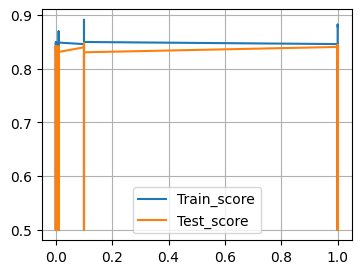

best alphas value is:  {'C': 0.1, 'degree': 2, 'gamma': 1.0, 'kernel': 'poly'}


In [201]:
plt.figure(figsize=(4,3))
plt.plot(alpha_values,train_score,label= 'Train_score')
plt.plot(alpha_values,test_score, label= 'Test_score' )
plt.legend()
plt.grid()
plt.show()
print('best alphas value is: ',neigh.best_params_)

In [162]:
neigh =SVC(gamma=neigh.best_params_['gamma'],k
           ernel =neigh.best_params_['kernel'],
           degree = neigh.best_params_['degree'],
           C=neigh.best_params_['C'],probability=True)
neigh.fit(x_train,y_train)

SVC(C=0.1, degree=2, gamma=1.0, kernel='poly', probability=True)

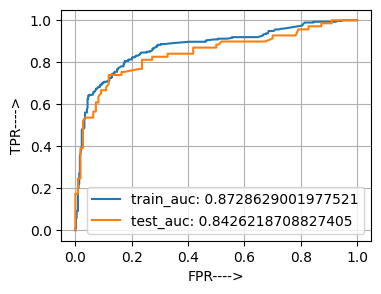

In [163]:
y_train_pred = neigh.predict_log_proba(x_train)[:,1]
y_test_pred  = neigh.predict_log_proba(x_test)[:,1]

tr_fpr,tr_tpr,tr_thershold = roc_curve(y_train,y_train_pred)
ts_fpr,ts_tpr,ts_thershold = roc_curve(y_test,y_test_pred)

plt.figure(figsize=(4,3))
plt.plot(tr_fpr,tr_tpr,label = 'train_auc: '+ str(auc(tr_fpr,tr_tpr)))
plt.plot(ts_fpr,ts_tpr,label = 'test_auc: '+ str(auc(ts_fpr,ts_tpr)))
plt.xlabel('FPR---->')
plt.ylabel('TPR---->')
plt.grid()
plt.legend()
plt.show()

In [164]:
tr_ther = tr_thershold[np.argmax([tr_tpr*(1-tr_fpr)])]
tr_ther

train_preds = []
for i in y_train_pred:
  if i>=tr_ther:
    train_preds.append(1)
  else:
    train_preds.append(0)

print(accuracy_score(y_train,train_preds))

0.8174157303370787


In [165]:
ts_ther = ts_thershold[np.argmax((ts_tpr*(1-ts_fpr)))]
ts_ther

test_preds = []
for i in y_test_pred:
  if i>=ts_ther:
    test_preds.append(1)
  else:
    test_preds.append(0)

print(accuracy_score(y_test,test_preds))

0.8268156424581006


In [181]:
score_svc = accuracy_score(y_test,test_preds)
scores['SVC'] = round(score_svc,2)

# Creation of Model Using GridsearchCV for hypertunning the parameters, and ROC curve, AUC for finding the thershold.(Decision Tree)

In [203]:
from sklearn.tree import DecisionTreeClassifier

In [204]:
estimator = DecisionTreeClassifier()
min_samples_split = np.array([3,5,7,9,11,15])
max_leaf_nodes   = np.array([5,10,15,20,25,30,35])
param_grid = {'min_samples_split':min_samples_split,'max_leaf_nodes':max_leaf_nodes}
neigh  = GridSearchCV(estimator,param_grid,cv =5, scoring ='roc_auc',return_train_score =True,verbose =2)

In [206]:
neigh.fit(x_train,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV] END ..............max_leaf_nodes=5, min_samples_split=3; total time=   0.0s
[CV] END ..............max_leaf_nodes=5, min_samples_split=3; total time=   0.0s
[CV] END ..............max_leaf_nodes=5, min_samples_split=3; total time=   0.0s
[CV] END ..............max_leaf_nodes=5, min_samples_split=3; total time=   0.0s
[CV] END ..............max_leaf_nodes=5, min_samples_split=3; total time=   0.0s
[CV] END ..............max_leaf_nodes=5, min_samples_split=5; total time=   0.0s
[CV] END ..............max_leaf_nodes=5, min_samples_split=5; total time=   0.0s
[CV] END ..............max_leaf_nodes=5, min_samples_split=5; total time=   0.0s
[CV] END ..............max_leaf_nodes=5, min_samples_split=5; total time=   0.0s
[CV] END ..............max_leaf_nodes=5, min_samples_split=5; total time=   0.0s
[CV] END ..............max_leaf_nodes=5, min_samples_split=7; total time=   0.0s
[CV] END ..............max_leaf_nodes=5, min_sa

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_leaf_nodes': array([ 5, 10, 15, 20, 25, 30, 35]),
                         'min_samples_split': array([ 3,  5,  7,  9, 11, 15])},
             return_train_score=True, scoring='roc_auc', verbose=2)

In [207]:
neigh.best_params_

{'max_leaf_nodes': 10, 'min_samples_split': 3}

In [208]:
results = pd.DataFrame.from_dict(neigh.cv_results_)

In [210]:
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_leaf_nodes,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004049,0.000965,0.003152,0.000553,5,3,"{'max_leaf_nodes': 5, 'min_samples_split': 3}",0.866322,0.802583,0.805556,...,0.817092,0.026857,19,0.812724,0.828263,0.825554,0.820727,0.832784,0.82401,0.006864
1,0.003074,0.000192,0.002824,0.000097,5,5,"{'max_leaf_nodes': 5, 'min_samples_split': 5}",0.866322,0.802583,0.805556,...,0.817092,0.026857,19,0.812724,0.828263,0.825554,0.820727,0.832784,0.82401,0.006864
2,0.003650,0.000329,0.003016,0.000503,5,7,"{'max_leaf_nodes': 5, 'min_samples_split': 7}",0.866322,0.802583,0.805556,...,0.817092,0.026857,19,0.812724,0.828263,0.825554,0.820727,0.832784,0.82401,0.006864
3,0.003512,0.000282,0.003210,0.000886,5,9,"{'max_leaf_nodes': 5, 'min_samples_split': 9}",0.866322,0.802583,0.805556,...,0.817092,0.026857,19,0.812724,0.828263,0.825554,0.820727,0.832784,0.82401,0.006864
4,0.003579,0.000678,0.003122,0.000938,5,11,"{'max_leaf_nodes': 5, 'min_samples_split': 11}",0.866322,0.802583,0.805556,...,0.817092,0.026857,19,0.812724,0.828263,0.825554,0.820727,0.832784,0.82401,0.006864


In [211]:
train_score = results['mean_train_score']
test_score  = results['mean_test_score']
alpha_values= results['param_max_leaf_nodes']

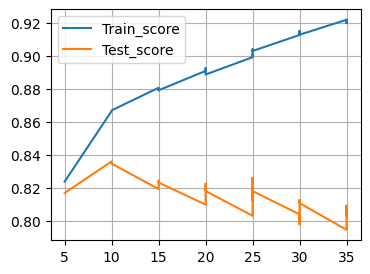

best alphas value is:  {'max_leaf_nodes': 10, 'min_samples_split': 3}


In [212]:
plt.figure(figsize=(4,3))
plt.plot(alpha_values,train_score,label= 'Train_score')
plt.plot(alpha_values,test_score, label= 'Test_score' )
plt.legend()
plt.grid()
plt.show()
print('best alphas value is: ',neigh.best_params_)

In [213]:
train_score = results['mean_train_score']
test_score  = results['mean_test_score']
alpha_values= results['param_min_samples_split']

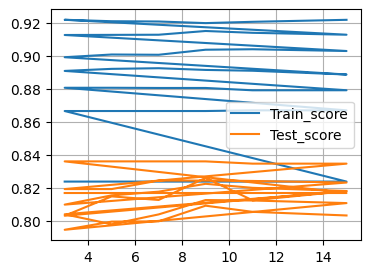

best alphas value is:  {'max_leaf_nodes': 10, 'min_samples_split': 3}


In [214]:
plt.figure(figsize=(4,3))
plt.plot(alpha_values,train_score,label= 'Train_score')
plt.plot(alpha_values,test_score, label= 'Test_score' )
plt.legend()
plt.grid()
plt.show()
print('best alphas value is: ',neigh.best_params_)

In [216]:
neigh = DecisionTreeClassifier(max_leaf_nodes =neigh.best_params_['max_leaf_nodes'],
                               min_samples_split=neigh.best_params_['min_samples_split'])
neigh.fit(x_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=10, min_samples_split=3)

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:965: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)


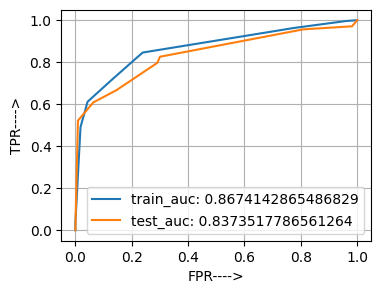

In [217]:
y_train_pred = neigh.predict_log_proba(x_train)[:,1]
y_test_pred  = neigh.predict_log_proba(x_test)[:,1]

tr_fpr,tr_tpr,tr_thershold = roc_curve(y_train,y_train_pred)
ts_fpr,ts_tpr,ts_thershold = roc_curve(y_test,y_test_pred)

plt.figure(figsize=(4,3))
plt.plot(tr_fpr,tr_tpr,label = 'train_auc: '+ str(auc(tr_fpr,tr_tpr)))
plt.plot(ts_fpr,ts_tpr,label = 'test_auc: '+ str(auc(ts_fpr,ts_tpr)))
plt.xlabel('FPR---->')
plt.ylabel('TPR---->')
plt.grid()
plt.legend()
plt.show()

In [218]:
tr_ther = tr_thershold[np.argmax([tr_tpr*(1-tr_fpr)])]
tr_ther

train_preds = []
for i in y_train_pred:
  if i>=tr_ther:
    train_preds.append(1)
  else:
    train_preds.append(0)

print(accuracy_score(y_train,train_preds))

0.7935393258426966


In [219]:
ts_ther = ts_thershold[np.argmax((ts_tpr*(1-ts_fpr)))]
ts_ther

test_preds = []
for i in y_test_pred:
  if i>=ts_ther:
    test_preds.append(1)
  else:
    test_preds.append(0)

print(accuracy_score(y_test,test_preds))

0.7486033519553073


In [220]:
score_dt = accuracy_score(y_test,test_preds)
scores['Decision_tree'] = round(score_dt,2)

# Creation of Model Using GridsearchCV for hypertunning the parameters, and ROC curve, AUC for finding the thershold.(Random Forest)

In [221]:
from sklearn.ensemble import RandomForestClassifier

In [224]:
estimator = RandomForestClassifier()
min_samples_split = np.array([3,5,7,9,11,15])
max_leaf_nodes    = np.array([5,10,15,20,25,30,35])
n_estimators      = np.array([25,30,35,50,75,100,150])
param_grid = {'min_samples_split':min_samples_split,'max_leaf_nodes':max_leaf_nodes,'n_estimators':n_estimators}
neigh  = GridSearchCV(estimator,param_grid,cv =5, scoring ='roc_auc',return_train_score =True,verbose =2)

In [225]:
neigh.fit(x_train,y_train)

Fitting 5 folds for each of 294 candidates, totalling 1470 fits
[CV] END max_leaf_nodes=5, min_samples_split=3, n_estimators=25; total time=   0.1s
[CV] END max_leaf_nodes=5, min_samples_split=3, n_estimators=25; total time=   0.1s
[CV] END max_leaf_nodes=5, min_samples_split=3, n_estimators=25; total time=   0.1s
[CV] END max_leaf_nodes=5, min_samples_split=3, n_estimators=25; total time=   0.1s
[CV] END max_leaf_nodes=5, min_samples_split=3, n_estimators=25; total time=   0.1s
[CV] END max_leaf_nodes=5, min_samples_split=3, n_estimators=30; total time=   0.1s
[CV] END max_leaf_nodes=5, min_samples_split=3, n_estimators=30; total time=   0.1s
[CV] END max_leaf_nodes=5, min_samples_split=3, n_estimators=30; total time=   0.1s
[CV] END max_leaf_nodes=5, min_samples_split=3, n_estimators=30; total time=   0.1s
[CV] END max_leaf_nodes=5, min_samples_split=3, n_estimators=30; total time=   0.1s
[CV] END max_leaf_nodes=5, min_samples_split=3, n_estimators=35; total time=   0.1s
[CV] END max

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_leaf_nodes': array([ 5, 10, 15, 20, 25, 30, 35]),
                         'min_samples_split': array([ 3,  5,  7,  9, 11, 15]),
                         'n_estimators': array([ 25,  30,  35,  50,  75, 100, 150])},
             return_train_score=True, scoring='roc_auc', verbose=2)

In [226]:
neigh.best_params_

{'max_leaf_nodes': 25, 'min_samples_split': 15, 'n_estimators': 25}

In [229]:
results = pd.DataFrame.from_dict(neigh.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_leaf_nodes,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.076198,0.008751,0.011135,0.002230,5,3,25,"{'max_leaf_nodes': 5, 'min_samples_split': 3, ...",0.902686,0.826860,...,0.845767,0.034067,135,0.844703,0.871331,0.855481,0.853881,0.869012,0.858882,0.009952
1,0.058608,0.004921,0.008411,0.001605,5,3,30,"{'max_leaf_nodes': 5, 'min_samples_split': 3, ...",0.905269,0.805888,...,0.838844,0.040748,278,0.843880,0.869965,0.855384,0.858708,0.870765,0.859740,0.009977
2,0.063130,0.007249,0.007628,0.000180,5,3,35,"{'max_leaf_nodes': 5, 'min_samples_split': 3, ...",0.907748,0.824070,...,0.846727,0.036525,93,0.843089,0.868678,0.863762,0.856288,0.869970,0.860357,0.009879
3,0.141205,0.009125,0.016876,0.004445,5,3,50,"{'max_leaf_nodes': 5, 'min_samples_split': 3, ...",0.907541,0.818388,...,0.845348,0.038868,152,0.848931,0.865685,0.854688,0.862071,0.873221,0.860919,0.008461
4,0.209968,0.007520,0.019586,0.002015,5,3,75,"{'max_leaf_nodes': 5, 'min_samples_split': 3, ...",0.903409,0.812707,...,0.844669,0.038972,173,0.849192,0.871344,0.862975,0.859631,0.874199,0.863468,0.008899


In [230]:
train_score = results['mean_train_score']
test_score  = results['mean_test_score']
alpha_values= results['param_n_estimators']

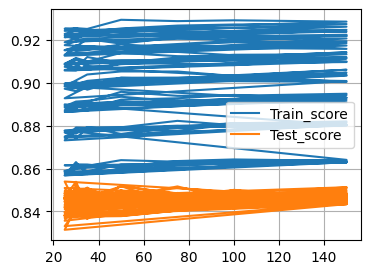

best alphas value is:  {'max_leaf_nodes': 25, 'min_samples_split': 15, 'n_estimators': 25}


In [231]:
plt.figure(figsize=(4,3))
plt.plot(alpha_values,train_score,label= 'Train_score')
plt.plot(alpha_values,test_score, label= 'Test_score' )
plt.legend()
plt.grid()
plt.show()
print('best alphas value is: ',neigh.best_params_)

In [232]:
neigh = RandomForestClassifier(max_leaf_nodes =neigh.best_params_['max_leaf_nodes'],
                               min_samples_split=neigh.best_params_['min_samples_split'],
                               n_estimators=neigh.best_params_['n_estimators'])
neigh.fit(x_train,y_train)

RandomForestClassifier(max_leaf_nodes=25, min_samples_split=15, n_estimators=25)

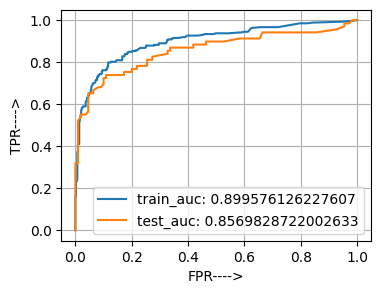

In [233]:
y_train_pred = neigh.predict_log_proba(x_train)[:,1]
y_test_pred  = neigh.predict_log_proba(x_test)[:,1]

tr_fpr,tr_tpr,tr_thershold = roc_curve(y_train,y_train_pred)
ts_fpr,ts_tpr,ts_thershold = roc_curve(y_test,y_test_pred)

plt.figure(figsize=(4,3))
plt.plot(tr_fpr,tr_tpr,label = 'train_auc: '+ str(auc(tr_fpr,tr_tpr)))
plt.plot(ts_fpr,ts_tpr,label = 'test_auc: '+ str(auc(ts_fpr,ts_tpr)))
plt.xlabel('FPR---->')
plt.ylabel('TPR---->')
plt.grid()
plt.legend()
plt.show()

In [236]:
tr_ther = tr_thershold[np.argmax([tr_tpr*(1-tr_fpr)])]
tr_ther

train_preds = []
for i in y_train_pred:
  if i>=tr_ther:
    train_preds.append(1)
  else:
    train_preds.append(0)

print(accuracy_score(y_train,train_preds))

0.851123595505618


In [237]:
ts_ther = ts_thershold[np.argmax((ts_tpr*(1-ts_fpr)))]
ts_ther

test_preds = []
for i in y_test_pred:
  if i>=ts_ther:
    test_preds.append(1)
  else:
    test_preds.append(0)

print(accuracy_score(y_test,test_preds))

0.8324022346368715


In [238]:
score_rf = accuracy_score(y_test,test_preds)
scores['Random_forest'] = round(score_rf,2)

# Creation of Model Using GridsearchCV for hypertunning the parameters, and ROC curve, AUC for finding the thershold.(SGD Classifier)

In [248]:
from sklearn.linear_model import SGDClassifier

In [250]:
estimator = SGDClassifier(penalty='l2',loss='log',max_iter=500)
alphas =np.array([0.00001,0.0001,0.001,0.01,0.1,1,10,100])
param_grid = {'alpha':alphas}
neigh  = GridSearchCV(estimator,param_grid,cv = 5,scoring = 'roc_auc',return_train_score =True,verbose=2)

In [253]:
neigh.fit(x_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/l

[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/l

[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/l

[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/l

[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/l

[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END .........................................alpha=10.0; total time=   0.0s
[CV] END .........................................alpha=10.0; total time=   0.0s
[CV] END .........................................alpha=10.0; total time=   0.0s
[CV] END .........................................alpha=10.0; total time=   0.0s
[CV] END .........................................alpha=10.0; total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/l

[CV] END ........................................alpha=100.0; total time=   0.0s
[CV] END ........................................alpha=100.0; total time=   0.0s
[CV] END ........................................alpha=100.0; total time=   0.0s
[CV] END ........................................alpha=100.0; total time=   0.0s
[CV] END ........................................alpha=100.0; total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/l

GridSearchCV(cv=5, estimator=SGDClassifier(loss='log', max_iter=500),
             param_grid={'alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             return_train_score=True, scoring='roc_auc', verbose=2)

In [254]:
neigh.best_params_

{'alpha': 0.001}

In [255]:
results = pd.DataFrame.from_dict(neigh.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.021303,0.008449,0.010117,0.003871,0.00001,{'alpha': 1e-05},0.876343,0.835640,0.820602,0.841751,...,0.834178,0.026220,6,0.807653,0.857556,0.843422,0.862350,0.857179,0.845632,0.020012
1,0.020097,0.004241,0.009141,0.003485,0.0001,{'alpha': 0.0001},0.902789,0.833161,0.843119,0.835438,...,0.846684,0.029124,2,0.846128,0.870664,0.866708,0.861895,0.872426,0.863564,0.009441
2,0.010465,0.004342,0.008897,0.005448,0.001,{'alpha': 0.001},0.921798,0.835021,0.853009,0.841540,...,0.853973,0.035703,1,0.846089,0.870129,0.864263,0.864243,0.874068,0.863758,0.009587
3,0.015374,0.008176,0.013260,0.003037,0.01,{'alpha': 0.01},0.917045,0.829029,0.854272,0.824285,...,0.845574,0.039251,3,0.836875,0.860275,0.850785,0.854629,0.863708,0.853254,0.009326
4,0.011512,0.003154,0.011076,0.003370,0.1,{'alpha': 0.1},0.907541,0.823864,0.849011,0.815236,...,0.838148,0.038773,4,0.823558,0.847533,0.840027,0.845256,0.853191,0.841913,0.010104


In [257]:
train_score = results['mean_train_score']
test_score  = results['mean_test_score']
alpha_values= results['param_alpha']

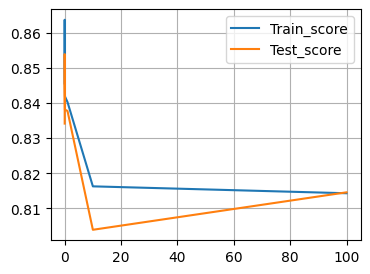

best alphas value is:  {'alpha': 0.001}


In [258]:
plt.figure(figsize=(4,3))
plt.plot(alpha_values,train_score,label= 'Train_score')
plt.plot(alpha_values,test_score, label= 'Test_score' )
plt.legend()
plt.grid()
plt.show()
print('best alphas value is: ',neigh.best_params_)

In [260]:
neigh = SGDClassifier(penalty='l2',loss='log',max_iter=500,alpha =neigh.best_params_['alpha'])
neigh.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


SGDClassifier(alpha=0.001, loss='log', max_iter=500)

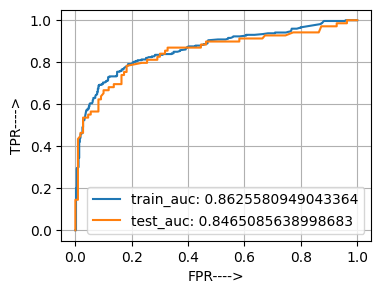

In [261]:
y_train_pred = neigh.predict_log_proba(x_train)[:,1]
y_test_pred  = neigh.predict_log_proba(x_test)[:,1]

tr_fpr,tr_tpr,tr_thershold = roc_curve(y_train,y_train_pred)
ts_fpr,ts_tpr,ts_thershold = roc_curve(y_test,y_test_pred)

plt.figure(figsize=(4,3))
plt.plot(tr_fpr,tr_tpr,label = 'train_auc: '+ str(auc(tr_fpr,tr_tpr)))
plt.plot(ts_fpr,ts_tpr,label = 'test_auc: '+ str(auc(ts_fpr,ts_tpr)))
plt.xlabel('FPR---->')
plt.ylabel('TPR---->')
plt.grid()
plt.legend()
plt.show()

In [262]:
tr_ther = tr_thershold[np.argmax([tr_tpr*(1-tr_fpr)])]
tr_ther

train_preds = []
for i in y_train_pred:
  if i>=tr_ther:
    train_preds.append(1)
  else:
    train_preds.append(0)

print(accuracy_score(y_train,train_preds))

0.824438202247191


In [263]:
ts_ther = ts_thershold[np.argmax((ts_tpr*(1-ts_fpr)))]
ts_ther

test_preds = []
for i in y_test_pred:
  if i>=ts_ther:
    test_preds.append(1)
  else:
    test_preds.append(0)

print(accuracy_score(y_test,test_preds))

0.8044692737430168


In [264]:
score_sgd = accuracy_score(y_test,test_preds)
scores['SGD'] = round(score_sgd,2)

# *Visualizing the Modle Scores*

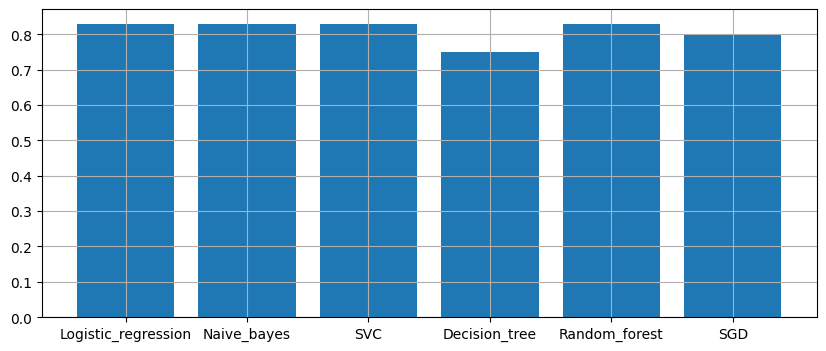

In [288]:
plt.figure(figsize= (10,4))
plt.bar(scores.keys(),scores.values())
plt.grid()
plt.show()

# *Creation of the Ensemble Model using all the above Models*

In [272]:
from sklearn.ensemble import VotingClassifier

In [274]:
model1 = DecisionTreeClassifier(max_leaf_nodes=10, min_samples_split=3)
model2 = RandomForestClassifier(max_leaf_nodes=25, min_samples_split=15, n_estimators=25)
model3 = LogisticRegression(C= 10.0,penalty='l2')
model4 = MultinomialNB(alpha= 1.0)
model5 = SGDClassifier(penalty='l2',loss='log',max_iter=500,alpha =0.001)
model6 = SVC(C=0.1, degree=2, gamma=1.0, kernel='poly', probability=True)        

In [275]:
estimators_all = [('DT', model1),('RF', model2),('LG', model3),('NB', model4),('SGD', model5),('SVC', model6)]

In [277]:
model_final = VotingClassifier(estimators = estimators_all, voting='hard')

In [278]:
model_final.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


VotingClassifier(estimators=[('DT',
                              DecisionTreeClassifier(max_leaf_nodes=10,
                                                     min_samples_split=3)),
                             ('RF',
                              RandomForestClassifier(max_leaf_nodes=25,
                                                     min_samples_split=15,
                                                     n_estimators=25)),
                             ('LG', LogisticRegression(C=10.0)),
                             ('NB', MultinomialNB()),
                             ('SGD',
                              SGDClassifier(alpha=0.001, loss='log',
                                            max_iter=500)),
                             ('SVC',
                              SVC(C=0.1, degree=2, gamma=1.0, kernel='poly',
                                  probability=True))])

In [280]:
y_pred = model_final.predict(x_test)

# **Final Ensemble model performance**

In [281]:
print(accuracy_score(y_test,y_pred))

0.8044692737430168


In [285]:
print(confusion_matrix(y_test,y_pred))

[[102   8]
 [ 27  42]]


In [286]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85       110
           1       0.84      0.61      0.71        69

    accuracy                           0.80       179
   macro avg       0.82      0.77      0.78       179
weighted avg       0.81      0.80      0.80       179

